In [109]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
info_df = pd.read_csv('snopes_ground_truth.csv')
info_df.head()

,snopes_page,topic,claim,claim_label,date_published,date_updated,page_url,page_is_example,page_is_image_credit,page_is_archived,page_is_first_citation,tags
0,http://www.snopes.com/rowan-atkinson-death-hoax/,fake news,"British actor Rowan Atkinson, best known as 'M...",False,"Jul 15th, 2016","Mar 18th, 2017",https://www.shutterstock.com/image-photo/mosco...,False,True,False,False,NaN
1,http://www.snopes.com/european-parental-leave-...,politics,"Canada, Norway, and Germany each offer federal...",True,"Mar 16th, 2017",NaN,https://www.facebook.com/senatorsanders/photos...,False,False,False,True,"canada,sen-kirsten-gillibrand,sen-bernie-sande..."
2,http://www.snopes.com/are-blue-balls-a-real-th...,love,Prolonged sexual arousal in men without an eja...,True,"Mar 15th, 2017",NaN,http://pediatrics.aappublications.org/content/...,False,False,False,True,NaN
3,http://www.snopes.com/politics/soapbox/knox.asp,political news,The president of Knox Machinery wrote a letter...,True,"Dec 16th, 2008","Mar 14th, 2017",http://knoxmachinery.com,False,False,False,True,NaN
4,http://www.snopes.com/photographs-of-eiffel-to...,NaN,It is illegal to take photographs of the Eiffe...,True,"Mar 13th, 2017",NaN,http://www.toureiffel.paris/,False,False,False,True,"paris,photography,eiffel-tower,copyright"


In [3]:
topic_fake_count = info_df.groupby(['topic', 'claim_label'])['claim_label'].count()
topic_fake_count

topic                claim_label
astronomy news       True            1
business             False           5
                     True           10
cokelore             True            1
college              False           1
                     True            1
computers            False           2
                     True            1
crime                False           4
                     True            8
critter country      False           2
                     True            9
disney               False           2
                     True            1
entertainment        False           7
                     True            7
fake news            False          81
                     True            1
fauxtography         False          51
                     True           44
food                 False           2
                     True            4
glurge gallery       True            3
history              False           4
                     True      

In [41]:
vectorizer = TfidfVectorizer(input='filename',max_df=0.7, max_features=100,
                                 min_df=2, stop_words='english',encoding='utf-8',decode_error ='ignore',
                                 use_idf=True)

In [86]:
import os
a = os.listdir('sentences_tokenized/')
import re
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

a = sorted_aphanumeric(a)
b =[]
for i in a:
    i = 'sentences_tokenized/'+i
    b.append(str(i)) 
vect_matrix = vectorizer.fit_transform(b)

In [87]:
vect_matrix.shape

(562, 100)

In [88]:
train_features, test_features = vect_matrix[:400,],vect_matrix[401:563,]
train_labels, test_labels = info_df['claim_label'][:400] , info_df['claim_label'][401:563]

In [89]:
logistic = linear_model.LogisticRegression()

logr= logistic.fit(train_features,train_labels)

In [90]:
logr.score(test_features,test_labels)

0.6956521739130435

In [91]:
mnb = MultinomialNB()
mnb.fit(train_features,train_labels)
mnb.score(test_features,test_labels)

0.7142857142857143

In [92]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(train_features,train_labels)
clf.score(test_features,test_labels)

0.6583850931677019

In [95]:
model = XGBClassifier()
model.fit(train_features, train_labels)
y_pred = model.predict(test_features)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.87%


C:\Users\hnpathak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[53 35]
 [11 62]]


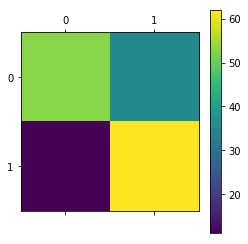

In [112]:
pred = mnb.predict(test_features)
labels = ['x', 'y']
cm = confusion_matrix(test_labels, pred)
print(cm)
plt.matshow(cm)
plt.colorbar()